In [268]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [269]:
#Importing body using pandas dataframe with read_csv function
bf_data = pd.read_csv('body_fat_data.csv')

In [270]:
#Getting the first 5 values from the data
bf_data.head()

,Unnamed: 0,Percent body fat using Siri equation 495/Density,Density gm/cm^3,Age,Weight (lbs),Height (inches),Adiposity index = Weight/Height^2 (kg/m^2),"Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)",Neck circumference (cm),Chest circumference (cm),Abdomen circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Extended biceps circumference (cm),Forearm circumference (cm),Wrist circumference (cm)
0,0,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,2,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,3,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,4,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [271]:
#Dropping the unnamed:0 column from the dataset
bf_data = bf_data.drop(['Unnamed: 0'],axis = 1)

In [272]:
#Getting the list of columns in the dataset
bf_data.columns

Index(['Percent body fat using Siri equation 495/Density', 'Density gm/cm^3',
       'Age', 'Weight (lbs)', 'Height (inches)',
       'Adiposity index = Weight/Height^2 (kg/m^2)',
       'Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)',
       'Neck circumference (cm)', 'Chest circumference (cm)',
       'Abdomen circumference (cm)', 'Hip circumference (cm)',
       'Thigh circumference (cm)', 'Knee circumference (cm)',
       'Ankle circumference (cm)', 'Extended biceps circumference (cm)',
       'Forearm circumference (cm)', 'Wrist circumference (cm)'],
      dtype='object')

In [273]:
#Renaming few columns from the dataset
bf_data.rename(columns={'Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)' : 'Fat Free Weight'},inplace = True)

In [274]:
#Getting data info
bf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Percent body fat using Siri equation 495/Density  252 non-null    float64
 1   Density gm/cm^3                                   252 non-null    float64
 2   Age                                               252 non-null    int64  
 3   Weight (lbs)                                      252 non-null    float64
 4   Height (inches)                                   252 non-null    float64
 5   Adiposity index = Weight/Height^2 (kg/m^2)        252 non-null    float64
 6   Fat Free Weight                                   252 non-null    float64
 7   Neck circumference (cm)                           252 non-null    float64
 8   Chest circumference (cm)                          252 non-null    float64
 9   Abdomen circumference

In [275]:
#Getting data mean, std, min, max etc..
bf_data.describe()

,Percent body fat using Siri equation 495/Density,Density gm/cm^3,Age,Weight (lbs),Height (inches),Adiposity index = Weight/Height^2 (kg/m^2),Fat Free Weight,Neck circumference (cm),Chest circumference (cm),Abdomen circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Extended biceps circumference (cm),Forearm circumference (cm),Wrist circumference (cm)
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,1.055574,44.884921,178.924405,70.148810,25.436905,143.713889,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,0.019031,12.602040,29.389160,3.662856,3.648111,18.231642,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,0.995000,22.000000,118.500000,29.500000,18.100000,105.900000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,1.041400,35.750000,159.000000,68.250000,23.100000,131.350000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,1.054900,43.000000,176.500000,70.000000,25.050000,141.550000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,1.070400,54.000000,197.000000,72.250000,27.325000,153.875000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,1.108900,81.000000,363.150000,77.750000,48.900000,240.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


<AxesSubplot:>

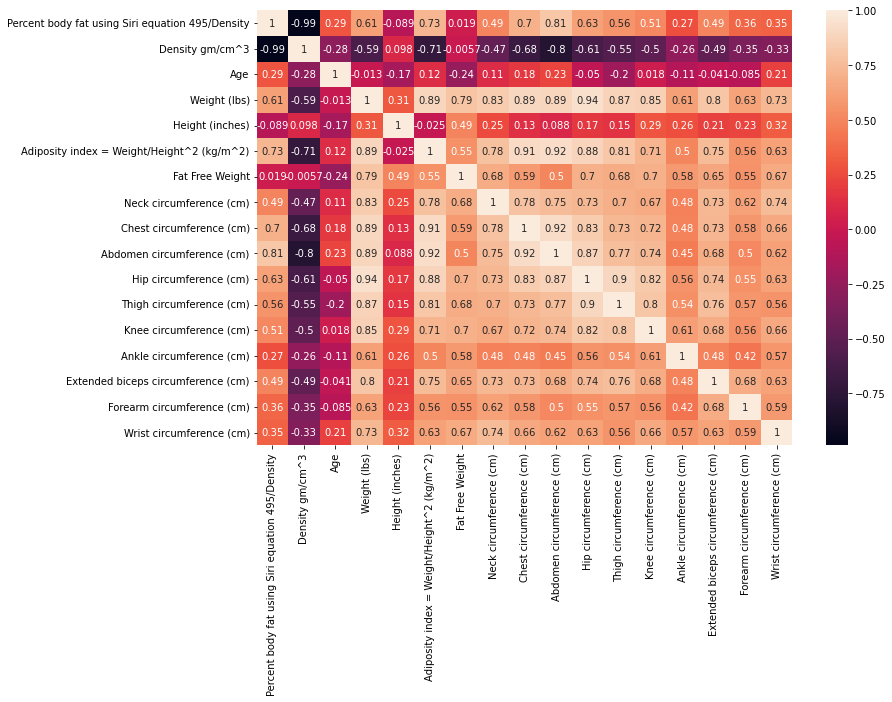

In [276]:
#Plotting data for visualisation using seaborn heatmap
plt.figure(figsize=(12,8))
sns.heatmap(bf_data.corr(),annot=True)

<AxesSubplot:>

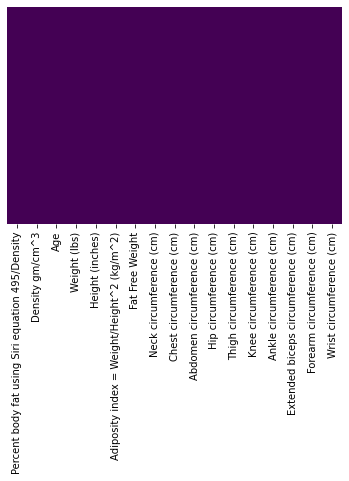

In [277]:
#Heatmap for checking if null values are there in the dataset
sns.heatmap(bf_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [278]:
#Getting column names from dataset
count=0
print("Column names: ")
for columns in bf_data.columns:
    count+=1
    print("{}. {}".format(count,columns))

Column names: 
1. Percent body fat using Siri equation 495/Density
2. Density gm/cm^3
3. Age
4. Weight (lbs)
5. Height (inches)
6. Adiposity index = Weight/Height^2 (kg/m^2)
7. Fat Free Weight
8. Neck circumference (cm)
9. Chest circumference (cm)
10. Abdomen circumference (cm)
11. Hip circumference (cm)
12. Thigh circumference (cm)
13. Knee circumference (cm)
14. Ankle circumference (cm)
15. Extended biceps circumference (cm)
16. Forearm circumference (cm)
17. Wrist circumference (cm)


In [279]:
#Dropping the body fat column from the dataset for data
X = bf_data.drop(['Percent body fat using Siri equation 495/Density'],axis=1)

In [280]:
#Listing training data columns
X.columns

Index(['Density gm/cm^3', 'Age', 'Weight (lbs)', 'Height (inches)',
       'Adiposity index = Weight/Height^2 (kg/m^2)', 'Fat Free Weight',
       'Neck circumference (cm)', 'Chest circumference (cm)',
       'Abdomen circumference (cm)', 'Hip circumference (cm)',
       'Thigh circumference (cm)', 'Knee circumference (cm)',
       'Ankle circumference (cm)', 'Extended biceps circumference (cm)',
       'Forearm circumference (cm)', 'Wrist circumference (cm)'],
      dtype='object')

In [281]:
#Getting body fat column for labels
Y = bf_data['Percent body fat using Siri equation 495/Density']

In [282]:
#Using train_test_split to split the data into train and test sets
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [283]:
print("Shape of Train_X: ",X_train.shape)
print("Shape of Train_Y: ",Y_train.shape)
print("Shape of Test_X: ",X_test.shape)
print("Shape of Test_Y: ",Y_test.shape)

Shape of Train_X:  (189, 16)
Shape of Train_Y:  (189,)
Shape of Test_X:  (63, 16)
Shape of Test_Y:  (63,)


In [284]:
#Initialising Lasso model and fitting it with train data and labels
lasso_model = Lasso()
lasso_model.fit(X_train,Y_train)

Lasso()

In [285]:
#Predicting the labels for test set using the model
pred_values = lasso_model.predict(X_test)

Text(0, 0.5, 'Predicted Values')

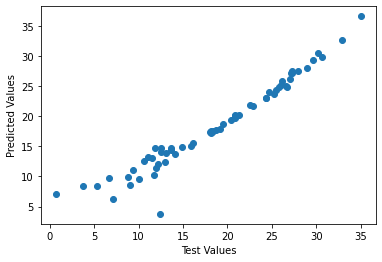

In [286]:
#Plotting the test labels and predicted labels with scatter
plt.scatter(Y_test,pred_values)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

In [287]:
#Model evaluation with Mean Absolute error, Mean Squared error and Root Mean squared error
print('MAE:', metrics.mean_absolute_error(Y_test, pred_values))
print('MSE:', metrics.mean_squared_error(Y_test, pred_values))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_values)))


MAE: 1.3045488179714593
MSE: 3.657772903388187
RMSE: 1.912530497374666


In [288]:
#Model evaluation using explained variance score and r2 score
print("Explained Variance Score: ",(metrics.explained_variance_score(Y_test,pred_values)*100))
print("R2 Score: ",(r2_score(Y_test,pred_values)*100))

Explained Variance Score:  94.09571196227073
R2 Score:  94.07079180553801


In [289]:
#Getting the coefficients to identify which measurements impact body fat
print("Intercept: ",lasso_model.intercept_)
print("Coeff: \n",lasso_model.coef_)

Intercept:  17.986261976968187
Coeff: 
 [-0.          0.          0.42985698  0.         -0.         -0.55847195
  0.          0.0344057   0.01094342 -0.          0.          0.
  0.          0.          0.          0.        ]


In [290]:
#Converting the coefficients to Dataframe
coeffecients = pd.DataFrame(lasso_model.coef_,X_train.columns)
coeffecients.columns = ['Coefficients']
coeffecients

,Coefficients
Density gm/cm^3,-0.000000
Age,0.000000
Weight (lbs),0.429857
Height (inches),0.000000
Adiposity index = Weight/Height^2 (kg/m^2),-0.000000
Fat Free Weight,-0.558472
Neck circumference (cm),0.000000
Chest circumference (cm),0.034406
Abdomen circumference (cm),0.010943
Hip circumference (cm),-0.000000


In [291]:
#Creating new dataset by dropping the columns which does not impact body fat
New_X = bf_data.drop(['Percent body fat using Siri equation 495/Density','Age','Height (inches)','Adiposity index = Weight/Height^2 (kg/m^2)'],axis=1)

In [292]:
#Body fat column for labels
New_Y = bf_data['Percent body fat using Siri equation 495/Density']

In [293]:
#Using train_test_split to split new data into train and test sets
New_X_train, New_X_test , New_Y_train, New_Y_test = train_test_split(X,Y, test_size=0.25)

In [294]:
#Using StandardScaler to standardise the values before fitting the model
Scaler = StandardScaler()
Train_scaled = Scaler.fit_transform(New_X_train)
Test_scaled = Scaler.fit_transform(New_X_test)

In [295]:
#Initialising new lasso model and training using scaled data
lasso_n = Lasso()
lasso_n.fit(Train_scaled,New_Y_train)

Lasso()

In [296]:
#Predictions using scaled test data
new_p = lasso_n.predict(Test_scaled)

Text(0, 0.5, 'Predicted Values')

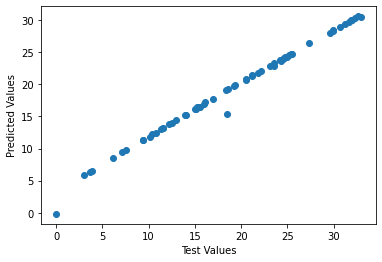

In [297]:
#Plotting the test labels and predictions
plt.scatter(New_Y_test,new_p)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

In [298]:
#Evaluating model using MAE, MSE and RMSE
print('MAE:', metrics.mean_absolute_error(New_Y_test,new_p))
print('MSE:', metrics.mean_squared_error(New_Y_test,new_p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(New_Y_test,new_p)))

MAE: 1.258611870538789
MSE: 2.18778331689377
RMSE: 1.479115721265165


In [299]:
#Evaluation of model using explained variance score and r2 score
print("Explained Variance Score: ",(metrics.explained_variance_score(New_Y_test,new_p)*100))
print("R2 Score: ",(r2_score(New_Y_test,new_p)*100))

Explained Variance Score:  97.056539200302
R2 Score:  96.94765274220457


### Complexity Parameter

In [300]:
#Importing LassoCV and RepeatedKFold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [301]:
#Using RepeatedKFold to randomly select samples over the dataset
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [302]:
#Creating list using numpy for complexity parameter
alphas = np.arange(0,1,0.01)

In [303]:
#Initialising LassoCV and fitting the model to find the best complexity parameter
lasso_cv = LassoCV(alphas=alphas,cv=cv)
lasso_cv.fit(X_train,Y_train)

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1))

In [304]:
#Printing the best complexity parameter
lasso_cv.alpha_

0.0

In [305]:
#Initialising final lasso model with the complexity parameter, fitting the model and predicting the labels for test set
final_lasso = Lasso(alpha=lasso_cv.alpha_)
final_lasso.fit(New_X_train,New_Y_train)
final_predictions = final_lasso.predict(New_X_test)

Text(0, 0.5, 'Predicted Values')

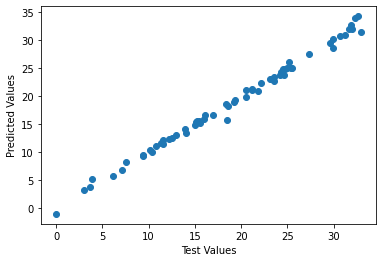

In [306]:
#Plotting test and predicted labels
plt.scatter(New_Y_test,final_predictions)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

In [307]:
#Evaluating model performance usinf MAE, MSE and RMSE
print('MAE:', metrics.mean_absolute_error(New_Y_test,final_predictions))
print('MSE:', metrics.mean_squared_error(New_Y_test,final_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(New_Y_test,final_predictions)))

MAE: 0.45079593152193503
MSE: 0.4491829640852105
RMSE: 0.6702111339609411


In [308]:
#Evaluation of model using explained variance score and r2 score
print("Explained Variance Score: ",(metrics.explained_variance_score(New_Y_test,final_predictions)*100))
print("R2 Score: ",(r2_score(New_Y_test,final_predictions)*100))

Explained Variance Score:  99.37540564398411
R2 Score:  99.37330978891431


In [309]:
#Getting the coefficients to identify which measurements impact body fat
print("Intercept: ",final_lasso.intercept_)
print("Coeff: \n",final_lasso.coef_)

Intercept:  260.6533996128615
Coeff: 
 [-2.45423916e+02  6.91682579e-03  1.68488497e-01  1.33640990e-02
 -3.08708278e-01 -2.52456247e-01  2.64452329e-02  9.19457480e-02
  4.28361406e-02  2.71831820e-02  6.85288605e-02  8.08051317e-02
  1.86849160e-02  4.20831811e-03  1.00010541e-01  1.48720204e-01]


In [310]:
#Converinting the coefficients to dataframe
coeffecients = pd.DataFrame(final_lasso.coef_,X_train.columns)
coeffecients.columns = ['Coefficients']
coeffecients

,Coefficients
Density gm/cm^3,-245.423916
Age,0.006917
Weight (lbs),0.168488
Height (inches),0.013364
Adiposity index = Weight/Height^2 (kg/m^2),-0.308708
Fat Free Weight,-0.252456
Neck circumference (cm),0.026445
Chest circumference (cm),0.091946
Abdomen circumference (cm),0.042836
Hip circumference (cm),0.027183
